# Gradient Descent for Linear Regression

We will implement and Linear Regression with Cost Function and Gradient Descent

### Tools

We will use:
* Numpy
* Matplotlib
* And some utils from Coursera's Machine Learning Specialization Course

In [1]:
import sys
sys.path.append('./LabUtlils/')

In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

# Problem:

Let's take these data points, a house with 1000 sqft sold at 300,000 dollars and a house with 2000 sqft sold for 500,000 dollars.

| Size (1000 sqft) | Price (1000s of dollars) |
|----------|----------|
| 1 | 300 |
| 2 | 500 |

In [3]:
# Load our data
X_train = np.array([1.0,2.0]) # Features
y_train = np.array([300.0, 500.0]) # Target Values

In [4]:
# Compute Cost (Mean Squared Error Cost)

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

# My Understanding of Gradient Descent:  

Gradient Descent can be used to minimize the cost function of any algorithm. 

The formula for Linear Regression is:

$$
f_{(w,b)}(x^i) = wx^{(i)} + b
$$

The formula for cost function for Linear Regression is:

$$
J_{(w,b)} = \frac{1}{2m}\sum_{i=0}^{m-1} (f_{w,b}(x^i) - y^i)^2 \tag{1}
$$

Gradient Descent formula is:

Repeat Until Convergence: { 
$$
w = w - \alpha * \frac {\partial J(w,b)}{\partial w}
$$
$$
b = b - \alpha * \frac {\partial J(w,b)}{\partial b}
$$
}

where paramters w,b and updated simeltaneously

The gradient is defined as:

$$
\frac {\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m=1}(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
$$

$$
\frac {\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m=1}(f_{w,b}(x^{(i)}) - y^{(i)})
$$

Here we can calculate the partial derivatives for all the paramters before updating any paramters

# Implementing Gradient Descent

We will implement gradient descent algorithm for one feature only

We will use three functions:

`compute_gradient:` For computing this formula $$
\frac {\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m=1}(f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
$$

$$
\frac {\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m=1}(f_{w,b}(x^{(i)}) - y^{(i)})
$$

`compute_cost`: For computing cost 

$$
J_{(w,b)} = \frac{1}{2m}\sum_{i=0}^{m-1} (f_{w,b}(x^i) - y^i)^2 \tag{1}
$$



`gradient_descent`: Utilizing both of the above functions

### Compute Gradient

`compute_gradient`: returns $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$. The comments below describle the operations:

In [5]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for Linear Regression
    Args:
        x:(ndarray(m,)): Data, m examples
        y:(ndarray(m,)): Target Values
        w,b: model parameters
    Returns:
        dj_dw: The gradient of the cost with the respect to w
        dj_db: The gradient of the cost with respect to b
    """

    # Number of training exampless
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    return dj_dw, dj_db

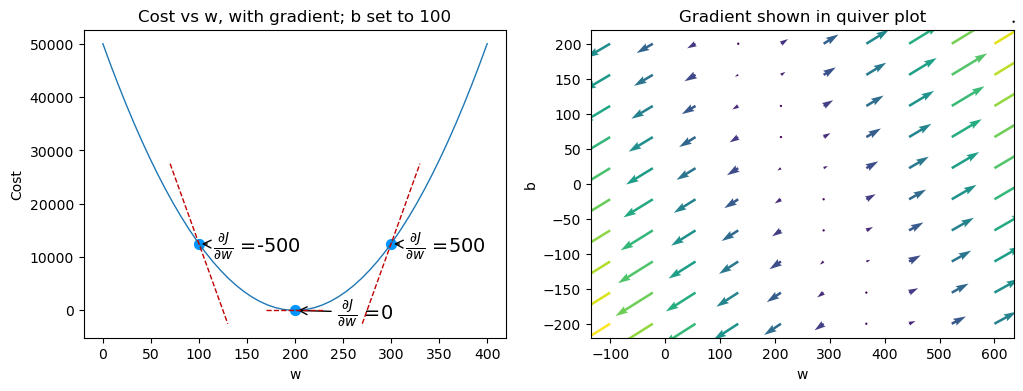

In [8]:
plt_gradients(X_train,y_train, compute_cost, compute_gradient)
plt.show()

So, the graph on the left simply shows three points. We take these plots and draw a tangent across them. We then measure the slope using trigonometry—the lower the value of the slope, the better the model's performance with that `w` value. Here, we can see that a sort of bowl is formed with only one parameter, `w` (where `b` is taken as 100 to simplify our understanding with a 2D graph). The lowest point on the graph, where the slope is 0, represents the best value for the parameter `w`.

## Gradient Descent

Now we can write a function to implement Gradient Descent for finding the optimal value of `w` and `b`

In [38]:
def gradient_descent(x,y,w_in, b_in,alpha,num_iters,cost_function,gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters gradient steps with learning rate alpha.

    Args:
        x(ndarray(m,)): Data, m examples
        y(ndarray(m,)): Target values
        w_in, b_in (scalar):initial values of model parameters
        alpha(float): Learning rate
        num_iters(int): number of iterations to run Gradient Descent
        cost_function: function to call to produce cost
        gradient_function: function to call to produce gradient

    Returns:
        w (scalar): Updated value of parameter w after running gradient descent
        b (scalar): Updated value of paramter b after running gradient descent
        J_history (List): History of the cost paramters
        p_history (List): History of paramters (w,b)
    """

    w = copy.deepcopy(w_in) # Avoid modifying global w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the paramters using gradient_function
        dj_dw, dj_db = gradient_function(x,y,w,b)
        # Update parameters using equation "repeat until convergence"
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # Save cost J at each iteration 
        if i < 100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        # Print cost every 10 intervals or as many iterations if i < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history #return w and J,w history for graphing

    

In [39]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
# Run gradient_descent
w_final, b_final, J_history, p_history = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost,compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 7.37e+04  dj_dw: -1.300e+03, dj_db: -8.000e+02   w:  1.300e+01, b: 8.00000e+00
Iteration 1000: Cost 7.91e-01  dj_dw: -3.577e-01, dj_db:  5.788e-01   w:  1.976e+02, b: 1.03961e+02
Iteration 2000: Cost 4.27e-02  dj_dw: -8.307e-02, dj_db:  1.344e-01   w:  1.994e+02, b: 1.00920e+02
Iteration 3000: Cost 2.30e-03  dj_dw: -1.929e-02, dj_db:  3.121e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 4000: Cost 1.24e-04  dj_dw: -4.480e-03, dj_db:  7.248e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 5000: Cost 6.69e-06  dj_dw: -1.040e-03, dj_db:  1.683e-03   w:  2.000e+02, b: 1.00012e+02
Iteration 6000: Cost 3.61e-07  dj_dw: -2.416e-04, dj_db:  3.909e-04   w:  2.000e+02, b: 1.00003e+02
Iteration 7000: Cost 1.95e-08  dj_dw: -5.610e-05, dj_db:  9.077e-05   w:  2.000e+02, b: 1.00001e+02
Iteration 8000: Cost 1.05e-09  dj_dw: -1.303e-05, dj_db:  2.108e-05   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 5.66e-11  dj_dw: -3.025e-06, dj_db:  4.895e-06   w:  2.000e+02, b: 1.00000e+02


## Predictions

Now that we have discovered the optimal values for parameters `w` and `b`, you can now use the model to predict the values based on our learned parameters.

In [48]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"1500 sqft house prediction {w_final*1.5 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 150.0 Thousand dollars
1200 sqft house prediction 160.0 Thousand dollars
1500 sqft house prediction 175.0 Thousand dollars
2000 sqft house prediction 200.0 Thousand dollars


### What I learnt from this:

* Took a deep dive into how gradient descent for a single variable works
* How to develop a function for computing gradient descent
* Visualized how the gradient is
* How to utilize Gradient Descent for finding parameter values
* Made some predictions using the parameter values